In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_movies = pd.read_csv('movies.csv')
df_movies

,Id,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


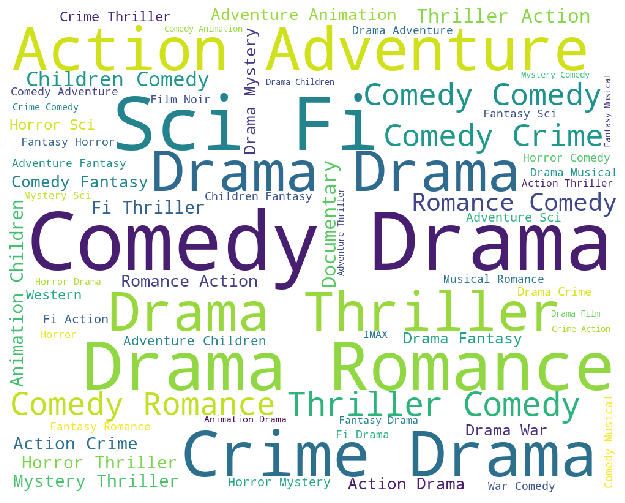

In [ ]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Import matplotlib
import matplotlib.pyplot as plt

# Prepare movie overview
paragraph=" ".join(df_movies.Genres.to_list())

# Create stopword list
stopword_list = set(list(STOPWORDS) + ['br',])

# Create WordCloud
word_cloud = WordCloud(width = 1000, height = 800,
                       background_color ='White',
                       stopwords = stopword_list,
                       min_font_size = 14).generate(paragraph)

# Set wordcloud figure size
plt.figure(figsize = (15, 9))

# Show image
plt.imshow(word_cloud)

# Remove Axis
plt.axis("off")

# save word cloud
# plt.savefig('wordcloud.jpeg',bbox_inches='tight')

# show plot
plt.show()

In [ ]:
movies=df_movies.iloc[:, 1:2]

movies['Title']= movies['Title'].str.strip()
movies

,Title
0,Toy Story (1995)
1,Jumanji (1995)
2,Grumpier Old Men (1995)
3,Waiting to Exhale (1995)
4,Father of the Bride Part II (1995)
...,...
9737,Black Butler: Book of the Atlantic (2017)
9738,No Game No Life: Zero (2017)
9739,Flint (2017)
9740,Bungo Stray Dogs: Dead Apple (2018)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tfidf_matrix = tf.fit_transform(movies['Title'])
print(tfidf_matrix.shape)

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)


# Build a 1-dimensional array with movie titles
titles = movies['Title']
indices = pd.Series(movies.index, index=movies['Title'])

(9742, 9269)
(9742, 9742)


In [ ]:
print(cosine_sim)

[[1.         0.18731077 0.13388121 ... 0.         0.         0.        ]
 [0.18731077 1.         0.14702473 ... 0.         0.         0.        ]
 [0.13388121 0.14702473 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
title=input("Enter the movie related to recommend:")
num=int(input("Number of recommendations:"))

idx = indices[title]

sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:num+1]
movie_indices = [i[0] for i in sim_scores]

scores=[i[1] for i in sim_scores]

print("Recommending movies similar to " + title + "...")
print("-------")
for rec in range(num):
    print("Recommended: " + titles[movie_indices[rec]] + " (score:" +      str(scores[rec]) + ")")

Enter the movie related to recommend:Jumanji (1995)
Number of recommendations:4
Recommending movies similar to Jumanji (1995)...
-------
Recommended: Jumanji: Welcome to the Jungle (2017) (score:0.5078224635188584)
Recommended: Friday (1995) (score:0.24282303337867384)
Recommended: Kids (1995) (score:0.23349295150874472)
Recommended: Dead Man (1995) (score:0.2322976228624652)
